# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587FA22 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA22issues.json

In [1]:
import os

import warnings
warnings.filterwarnings('ignore')

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [2]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587FA22issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Sanity test: print rows in our DataFrame

issues_df
    

issue_number  created_at   closed_at  \
0             379  2022-11-07        None   
1             377  2022-11-05        None   
2             374  2022-11-04  2022-11-04   
3             373  2022-11-04  2022-11-04   
4             371  2022-11-03  2022-11-03   
..            ...         ...         ...   
186             6  2022-10-13  2022-10-30   
187             5  2022-10-13  2022-10-30   
188             4  2022-10-13  2022-10-27   
189             3  2022-10-13  2022-10-27   
190             2  2022-10-12  2022-10-27   

                                                labels   State       Author  
0    [Category: Bug, Priority: Critical, Status: Co...    open  AFA22SCM92K  
1    [Category: Inquiry, DetectionPhase: Field, Ori...    open  CFA22SCM54E  
2    [Category: Bug, DetectionPhase: Design, Origin...  closed  CFA22SCM54E  
3    [Category: Bug, DetectionPhase: Testing, Prior...  closed  SFA22SCM51R  
4    [Category: Bug, DetectionPhase: Testing, Prior...  closed  SFA22SCM03J  
..                                                 ...     ...          ...  
186  [OriginationPhase: Field, Priority: Low, Statu...  closed  ASP22SCM02R  
187  [Category: Enhancement, DetectionPhase: Docume...  closed  ASP22SCM02R  
188  [Category: Bug, DetectionPhase: Design, Origin...  closed  ASP22SCM02R  
189  [DetectionPhase: Coding, Priority: Medium, Sta...  closed  ASP22SCM02R  
190            [Category: Bug, DetectionPhase: Coding]  closed   SPM587FA22  

[191 rows x 6 columns]

In [5]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [6]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0    AFA22SCM92K    open        None  2022-11-07           379   
1    CFA22SCM54E    open        None  2022-11-05           377   
2    CFA22SCM54E  closed  2022-11-04  2022-11-04           374   
3    SFA22SCM51R  closed  2022-11-04  2022-11-04           373   
4    SFA22SCM03J  closed  2022-11-03  2022-11-03           371   
..           ...     ...         ...         ...           ...   
186  ASP22SCM02R  closed  2022-10-30  2022-10-13             6   
187  ASP22SCM02R  closed  2022-10-30  2022-10-13             5   
188  ASP22SCM02R  closed  2022-10-27  2022-10-13             4   
189  ASP22SCM02R  closed  2022-10-27  2022-10-13             3   
190   SPM587FA22  closed  2022-10-27  2022-10-12             2   

                                                labels  OriginationPhase  \
0    [Category: Bug, Priority: Critical, Status: Co...               NaN   
1    [Category: Inquiry, DetectionPhase: Field, Ori...               NaN   
2    [Category: Bug, DetectionPhase: Design, Origin...               NaN   
3    [Category: Bug, DetectionPhase: Testing, Prior...               NaN   
4    [Category: Bug, DetectionPhase: Testing, Prior...               NaN   
..                                                 ...               ...   
186  [OriginationPhase: Field, Priority: Low, Statu...               NaN   
187  [Category: Enhancement, DetectionPhase: Docume...               NaN   
188  [Category: Bug, DetectionPhase: Design, Origin...               NaN   
189  [DetectionPhase: Coding, Priority: Medium, Sta...               NaN   
190            [Category: Bug, DetectionPhase: Coding]               NaN   

     DetectionPhase  Category  Priority  Status  
0               NaN       NaN       NaN     NaN  
1               NaN       NaN       NaN     NaN  
2               NaN       NaN       NaN     NaN  
3               NaN       NaN       NaN     NaN  
4               NaN       NaN       NaN     NaN  
..              ...       ...       ...     ...  
186             NaN       NaN       NaN     NaN  
187             NaN       NaN       NaN     NaN  
188             NaN       NaN       NaN     NaN  
189             NaN       NaN       NaN     NaN  
190             NaN       NaN       NaN     NaN  

[191 rows x 11 columns]

In [7]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            if len(label.split(':')) == 2:
                label_name= (label.split(':'))[0]
                label_value= (label.split(':'))[1]
                wrangled_issues_df.loc[i, label_name]=label_value
 

In [8]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0    AFA22SCM92K    open        None  2022-11-07           379   
1    CFA22SCM54E    open        None  2022-11-05           377   
2    CFA22SCM54E  closed  2022-11-04  2022-11-04           374   
3    SFA22SCM51R  closed  2022-11-04  2022-11-04           373   
4    SFA22SCM03J  closed  2022-11-03  2022-11-03           371   
..           ...     ...         ...         ...           ...   
186  ASP22SCM02R  closed  2022-10-30  2022-10-13             6   
187  ASP22SCM02R  closed  2022-10-30  2022-10-13             5   
188  ASP22SCM02R  closed  2022-10-27  2022-10-13             4   
189  ASP22SCM02R  closed  2022-10-27  2022-10-13             3   
190   SPM587FA22  closed  2022-10-27  2022-10-12             2   

                                                labels OriginationPhase  \
0    [Category: Bug, Priority: Critical, Status: Co...           Design   
1    [Category: Inquiry, DetectionPhase: Field, Ori...           Coding   
2    [Category: Bug, DetectionPhase: Design, Origin...     Requirements   
3    [Category: Bug, DetectionPhase: Testing, Prior...           Design   
4    [Category: Bug, DetectionPhase: Testing, Prior...     Requirements   
..                                                 ...              ...   
186  [OriginationPhase: Field, Priority: Low, Statu...            Field   
187  [Category: Enhancement, DetectionPhase: Docume...            Field   
188  [Category: Bug, DetectionPhase: Design, Origin...           Design   
189  [DetectionPhase: Coding, Priority: Medium, Sta...              NaN   
190            [Category: Bug, DetectionPhase: Coding]              NaN   

     DetectionPhase      Category   Priority          Status  
0            Design           Bug   Critical       Completed  
1             Field       Inquiry       High      inProgress  
2            Design           Bug   Critical   pendingReview  
3           Testing           Bug      Major        Approved  
4           Testing           Bug   Critical        Approved  
..              ...           ...        ...             ...  
186             NaN           NaN        Low      inProgress  
187   Documentation   Enhancement        NaN             NaN  
188          Design           Bug       High   pendingReview  
189          Coding           NaN     Medium      inProgress  
190          Coding           Bug        NaN             NaN  

[191 rows x 11 columns]

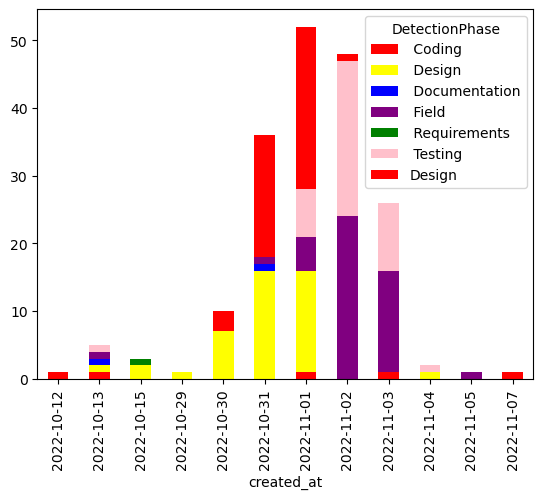

In [9]:
# Plot in Bar Chart the total number of issues created every day for every Detection Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green', 'pink'], grid=False)

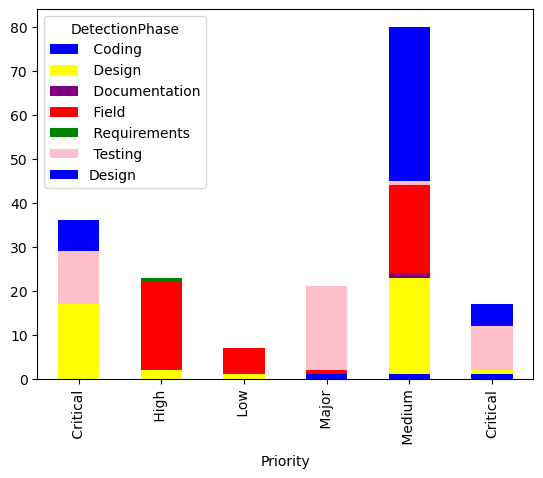

In [10]:
# Plot in Bar Chart the total number of issues created for every Phase based on their priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)

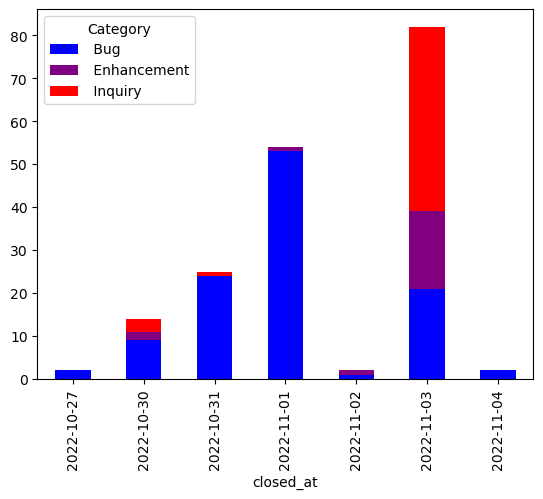

In [11]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green', 'pink'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

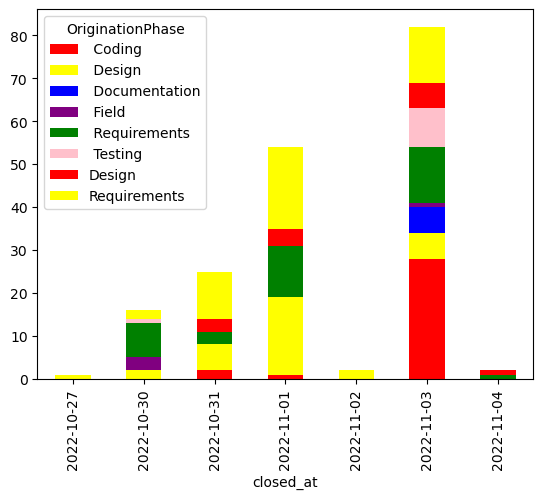

In [12]:
# Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green', 'pink'], grid=False)

#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status

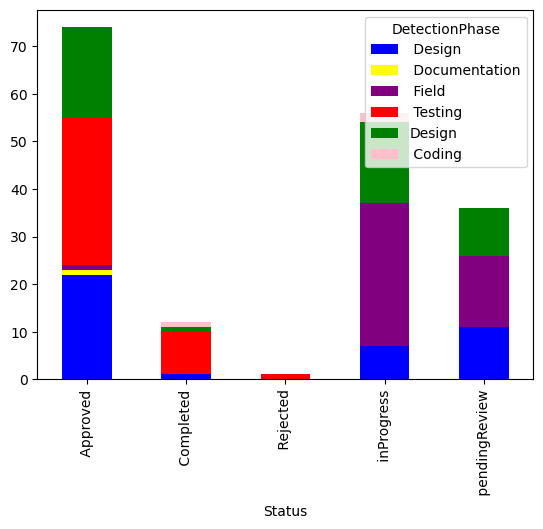

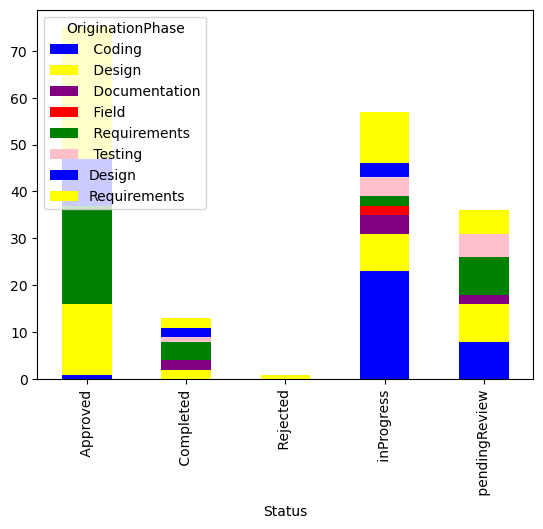

In [13]:
# Requirement #2: Plot in Bar Chart the total number of issues created for every Phase based on their Status

LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)


LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','OriginationPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green', 'pink'], grid=False)